## Model 1: Linear Regression

In [1]:
# import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit


In [2]:
housing = pd.read_csv('housing.csv')

In [3]:
housing.head(n=10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


#### 1. Explore the dataset

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
len(housing)

20640

In [6]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


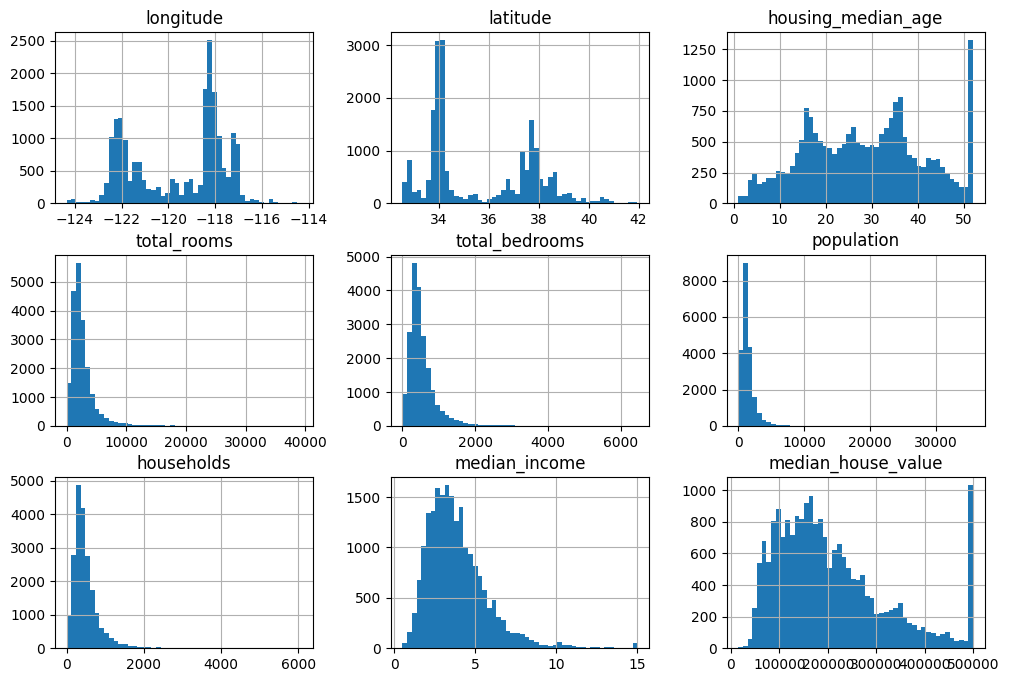

In [8]:
# Visualizing the distribution of the sameples within dataset

housing.hist(bins=50,figsize=(12,8))
plt.show()

#### 2. Train Test Split

In [9]:
train_set,test_set = train_test_split(housing, test_size = 0.2, random_state= 42)

In [10]:
housing['income_cat'] = pd.cut(housing['median_income'], 
                            bins = [0,1.5,3.0,4.5,6,np.inf],
                            labels=[1,2,3,4,5])

In [11]:
housing ['income_cat'].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

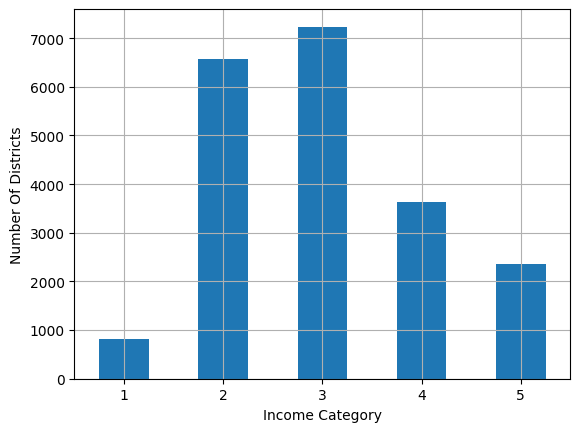

In [12]:
housing ['income_cat'].value_counts().sort_index().plot.bar(rot=0, grid = True)
plt.xlabel('Income Category')
plt.ylabel('Number Of Districts')
plt.show()

In [13]:
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2 , random_state=42 )

In [14]:
strat_splits =[]

for train_index,test_index in splitter.split(housing, housing['income_cat']):

    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]

    strat_splits.append([strat_train_set_n,strat_test_set_n])



In [15]:
strat_train_set, strat_test_set = strat_splits[0]

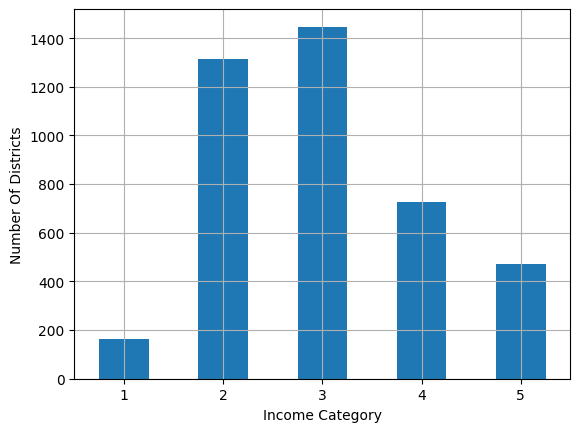

In [16]:
strat_test_set['income_cat'].value_counts().sort_index().plot.bar(rot=0, grid = True)
plt.xlabel('Income Category')
plt.ylabel('Number Of Districts')
plt.show()

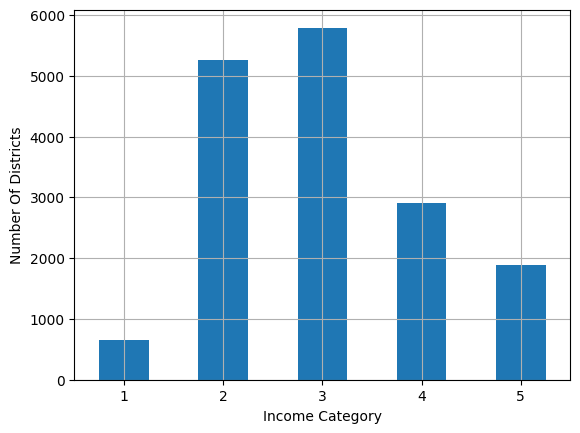

In [17]:
strat_train_set['income_cat'].value_counts().sort_index().plot.bar(rot=0, grid = True)
plt.xlabel('Income Category')
plt.ylabel('Number Of Districts')
plt.show()

### 3. Explore the patterns in training set

In [18]:
housing = strat_train_set.copy()

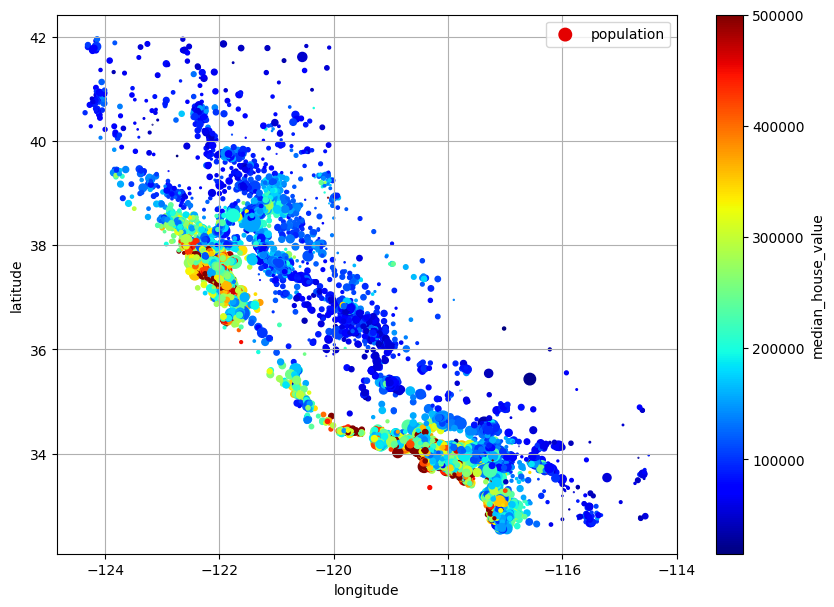

In [19]:
housing.plot(kind='scatter',x='longitude',y='latitude',grid = True,
             s=housing['population']/100,label='population',c='median_house_value',
             cmap='jet',colorbar=True,legend=True,sharex=False,figsize=(10,7))

plt.show()

In [20]:
# Look For Correlations

In [21]:
corr_matrix=housing[[x for x in list(housing.columns) if x not in ['ocean_proximity', 'income_cat']]].corr()

In [22]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

In [23]:
# Experiment With Attribute Combinations

In [24]:
housing['rooms_per_house']= housing['total_rooms'] / housing['households']
housing['bedrooms_ratio']= housing['total_bedrooms'] / housing['total_rooms']
housing['people_per_house']= housing['population'] / housing['households']

In [25]:
corr_matrix = housing[[x for x in list(housing.columns) if x not in ['ocean_proximity', 'income_cat']]].corr()

In [26]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

In [27]:
# prepare the data for training

In [28]:
housing = strat_train_set.drop('median_house_value',axis =1)
housing_labels = strat_train_set['median_house_value'].copy()

In [29]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY,2
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN,5
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND,2
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND,2
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,<1H OCEAN,4
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,INLAND,2
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,NEAR OCEAN,3
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,<1H OCEAN,3


In [30]:
housing_labels

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
           ...   
14207    500001.0
13105     88800.0
19301    148800.0
19121    500001.0
19888    233300.0
Name: median_house_value, Length: 16512, dtype: float64

##### 4. Clean the data

In [31]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16344 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   ocean_proximity     16512 non-null  object  
 9   income_cat          16512 non-null  category
dtypes: category(1), float64(8), object(1)
memory usage: 1.3+ MB


In [32]:
housing.loc[housing['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
14452,-120.67,40.50,15.0,5343.0,NaN,2503.0,902.0,3.5962,INLAND,3
18217,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN,3
11889,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,<1H OCEAN,3
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN,4
14360,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,<1H OCEAN,5
...,...,...,...,...,...,...,...,...,...,...
2348,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN,3
366,-122.50,37.75,44.0,1819.0,NaN,1137.0,354.0,3.4919,NEAR OCEAN,3
18241,-121.44,38.54,39.0,2855.0,NaN,1217.0,562.0,3.2404,INLAND,3
18493,-116.21,33.75,22.0,894.0,NaN,830.0,202.0,3.0673,INLAND,3


In [33]:
from sklearn.impute import SimpleImputer

In [34]:
imputer = SimpleImputer(strategy='median')

In [35]:
housing_num =  housing.select_dtypes(include=[np.number])

In [36]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [37]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [38]:
housing_num.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [39]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [40]:
X = imputer.transform(housing_num)

In [41]:
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [42]:
housing_tr =  pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)

In [43]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [44]:
# Handling Categorical Features

In [45]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


In [46]:
# Encoding the categorical features

In [47]:
from sklearn.preprocessing import OrdinalEncoder

In [48]:
ordinal_encoder = OrdinalEncoder()

housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [49]:
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

In [50]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [51]:
from sklearn.preprocessing import OneHotEncoder

In [52]:
cat_encoder = OneHotEncoder()

housing_cat_1hot =cat_encoder.fit_transform(housing_cat)

In [53]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [54]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [55]:
# Feature Scaling




In [56]:
housing_num.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000
mean,-119.573125,35.637746,28.577156,2639.402798,538.949094,1425.513929,499.990189,3.870428
std,2.000624,2.133294,12.585738,2185.287466,423.862079,1094.795467,382.865787,1.891936
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1447.000000,296.000000,787.000000,279.000000,2.562500
50%,-118.510000,34.260000,29.000000,2125.000000,434.000000,1167.000000,408.000000,3.538500
75%,-118.010000,37.720000,37.000000,3154.000000,645.000000,1726.000000,603.000000,4.750000
max,-114.490000,41.950000,52.000000,39320.000000,6210.000000,16305.000000,5358.000000,15.000100


### Min-Max Method Formula

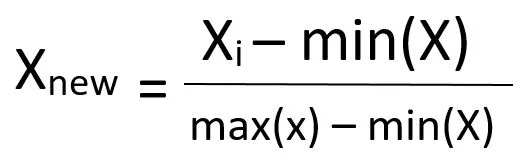

## Standard Scaler Formula
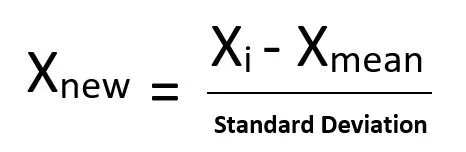

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
min_max_scaler = MinMaxScaler(feature_range=(-1,1))

In [59]:
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [60]:
housing_num_min_max_scaled

array([[-0.60851927,  0.11702128,  1.        , ..., -0.80701754,
        -0.61433638, -0.7794789 ],
       [ 0.21095335, -0.66170213,  0.52941176, ..., -0.91866029,
        -0.86708979, -0.22929339],
       [-0.51926978,  0.23617021,  0.25490196, ..., -0.93141946,
        -0.92458466, -0.73336919],
       ...,
       [ 0.47870183, -0.99148936, -0.52941176, ..., -0.65513434,
        -0.71663244, -0.50873781],
       [ 0.20689655, -0.6787234 ,  0.41176471, ..., -0.78873758,
        -0.68751167, -0.49716556],
       [-0.60649087,  0.08723404,  0.68627451, ..., -0.91669734,
        -0.92122457, -0.61608805]])

In [61]:
min_max_scaler.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [62]:
pd.DataFrame(housing_num_min_max_scaled,columns=min_max_scaler.feature_names_in_)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-0.608519,0.117021,1.000000,-0.831171,-0.641166,-0.807018,-0.614336,-0.779479
1,0.210953,-0.661702,0.529412,-0.900148,-0.886294,-0.918660,-0.867090,-0.229293
2,-0.519270,0.236170,0.254902,-0.945012,-0.930424,-0.931419,-0.924585,-0.733369
3,0.468560,-0.744681,-0.372549,-0.787782,-0.726204,-0.774015,-0.709166,-0.756983
4,0.257606,-0.740426,0.372549,-0.778015,-0.610243,-0.765796,-0.562815,-0.582171
...,...,...,...,...,...,...,...,...
16507,0.206897,-0.721277,0.568627,-0.886312,-0.808021,-0.885290,-0.805115,-0.419236
16508,0.022312,-0.197872,-0.137255,-0.850298,-0.809631,-0.826279,-0.801755,-0.714018
16509,0.478702,-0.991489,-0.529412,-0.800702,-0.750684,-0.655134,-0.716632,-0.508738
16510,0.206897,-0.678723,0.411765,-0.807773,-0.719117,-0.788738,-0.687512,-0.497166


In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
std_scaler = StandardScaler()

housing_num_std_scaled = std_scaler.fit_transform(housing_num)

In [65]:
pd.DataFrame(housing_num_std_scaled,columns=std_scaler.get_feature_names_out())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.423037,1.013606,1.861119,0.311912,1.359094,0.137460,1.394812,-0.936491
1,0.596394,-0.702103,0.907630,-0.308620,-0.436356,-0.693771,-0.373485,1.171942
2,-1.203098,1.276119,0.351428,-0.712240,-0.759584,-0.788768,-0.775727,-0.759789
3,1.231216,-0.884924,-0.919891,0.702262,0.736231,0.383175,0.731375,-0.850281
4,0.711362,-0.875549,0.589800,0.790125,1.585590,0.444376,1.755263,-0.180365
...,...,...,...,...,...,...,...,...
16507,0.586397,-0.833359,0.987087,-0.184147,0.136961,-0.445315,0.060101,0.444041
16508,0.131525,0.319822,-0.443146,0.139847,0.125165,-0.005950,0.083608,-0.685630
16509,1.256209,-1.428701,-1.237721,0.586026,0.556922,1.268299,0.679135,0.101049
16510,0.586397,-0.739605,0.669257,0.522417,0.788136,0.273563,0.882868,0.145396


In [66]:
## Handling the distribution of data

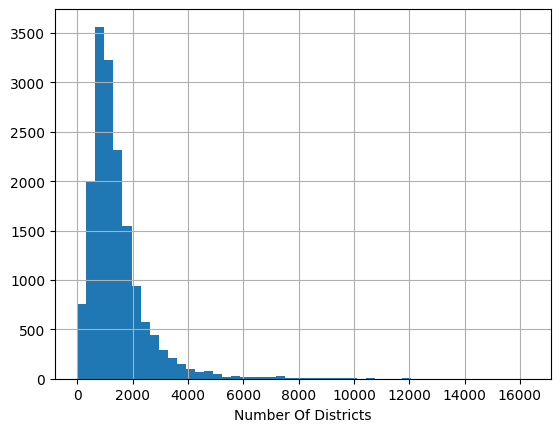

In [67]:
housing['population'].hist(bins=50)
plt.xlabel('Population')
plt.xlabel('Number Of Districts')
plt.show()

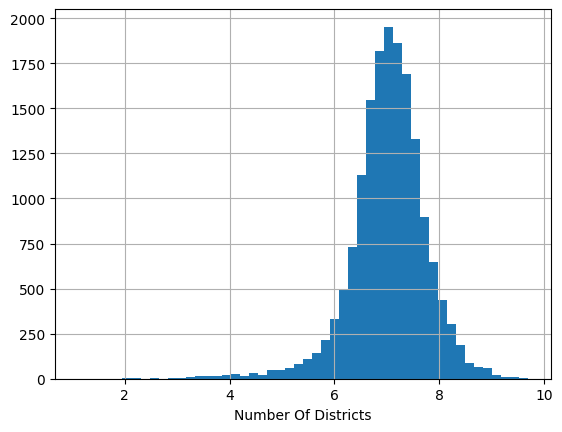

In [68]:
housing['population'].apply(np.log).hist(bins=50)
plt.xlabel('Log Of Population')
plt.xlabel('Number Of Districts')
plt.show()

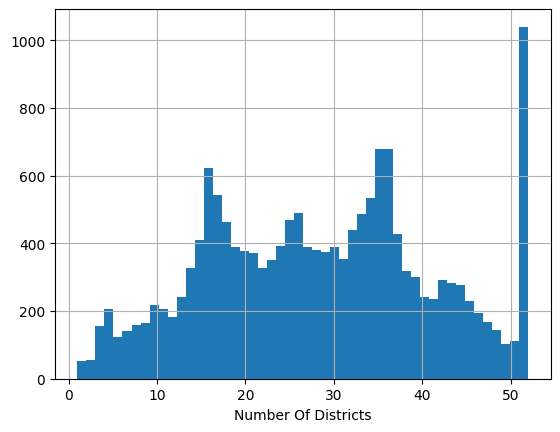

In [69]:
housing['housing_median_age'].hist(bins=50)
plt.xlabel('Population')
plt.xlabel('Number Of Districts')
plt.show()

In [70]:
from sklearn.metrics.pairwise import rbf_kernel


age_similar_35 = rbf_kernel(housing[['housing_median_age']], [[35]] , gamma =0.1)

In [71]:
age_similar_35

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]])

In [72]:
housing[['housing_median_age']]

,housing_median_age
13096,52.0
14973,40.0
3785,33.0
14689,17.0
20507,36.0
...,...
14207,41.0
13105,23.0
19301,13.0
19121,37.0


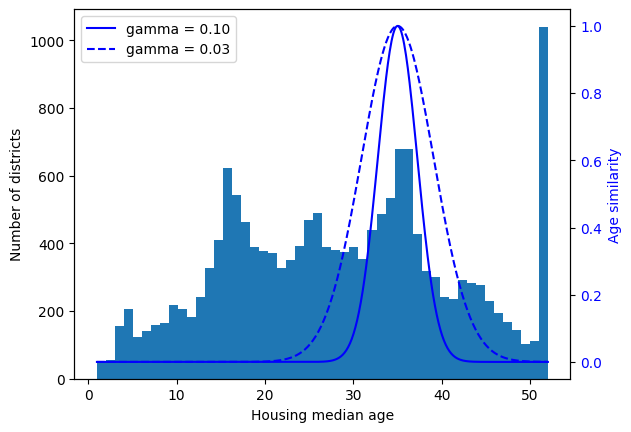

In [73]:
# extra code – this cell generates Figure 2–18

ages = np.linspace(housing["housing_median_age"].min(),
                   housing["housing_median_age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
# save_fig("age_similarity_plot")
plt.show()

In [74]:
from sklearn.preprocessing import FunctionTransformer

In [75]:
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)

log_pop = log_transformer.transform(housing['population'])

<Axes: >

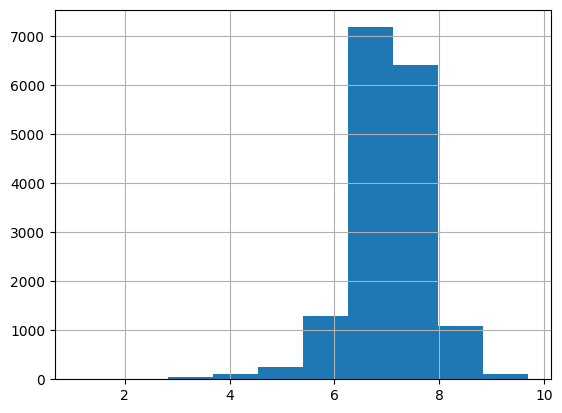

In [76]:
log_pop.hist()

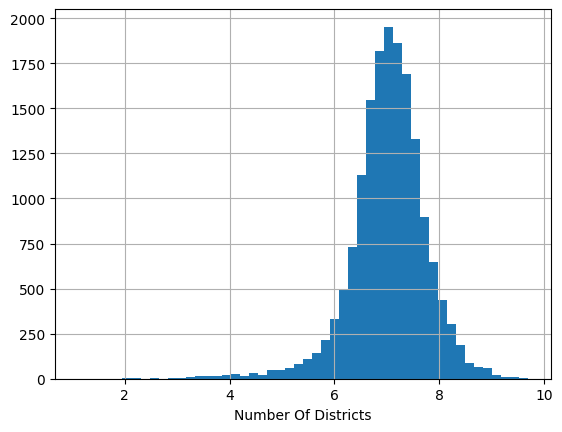

In [77]:
log_pop.hist(bins=50)
plt.xlabel('Log Of Population')
plt.xlabel('Number Of Districts')
plt.show()

In [78]:
# Creating a custom transformer to incorporate new attribute into input features

from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin


class ClusterSimilarity(BaseEstimator,TransformerMixin):

    def __init__(self,n_clusters=10, gamma=1.0, random_state=None):

        self.n_clusters = n_clusters
        self.random_state = random_state
        self.gamma=gamma
    
    def fit(self,X,y=None, sample_weight=None):

        self.kmeans_=KMeans(self.n_clusters,random_state=self.random_state)

        self.kmeans_.fit(X,sample_weight=sample_weight)

        return self
    
    def transform(self,X):

        return rbf_kernel(X,self.kmeans_.cluster_centers_,gamma = self.gamma)
    

    def get_feature_names_out(self,names=None):

        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]






In [79]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1 , random_state=42)

In [80]:
similarities = cluster_simil.fit_transform(housing[['latitude','longitude']],sample_weight=housing_labels)

In [81]:
similarities[0]

array([7.76542973e-17, 9.79800335e-01, 5.48714294e-08, 1.39802338e-23,
       9.63314534e-04, 1.37867731e-04, 1.27105542e-01, 5.54756787e-01,
       4.68660945e-14, 5.60181642e-01])

In [82]:
housing.loc[0,['latitude','longitude']]

latitude      37.88
longitude   -122.23
Name: 0, dtype: object

In [83]:
cluster_simil.kmeans_.cluster_centers_

array([[  33.85060232, -117.78356573],
       [  37.78134861, -122.27837164],
       [  34.69948885, -119.75445997],
       [  32.94170114, -117.03285512],
       [  40.43172026, -122.55848854],
       [  36.70545668, -119.64670039],
       [  38.44920556, -121.13887954],
       [  38.51687956, -122.69442517],
       [  34.06008475, -118.33288417],
       [  37.22873003, -121.91686502]])

In [84]:
similarities[:3].round(2)

array([[0.  , 0.98, 0.  , 0.  , 0.  , 0.  , 0.13, 0.55, 0.  , 0.56],
       [0.64, 0.  , 0.11, 0.04, 0.  , 0.  , 0.  , 0.  , 0.99, 0.  ],
       [0.  , 0.65, 0.  , 0.  , 0.01, 0.  , 0.49, 0.59, 0.  , 0.28]])

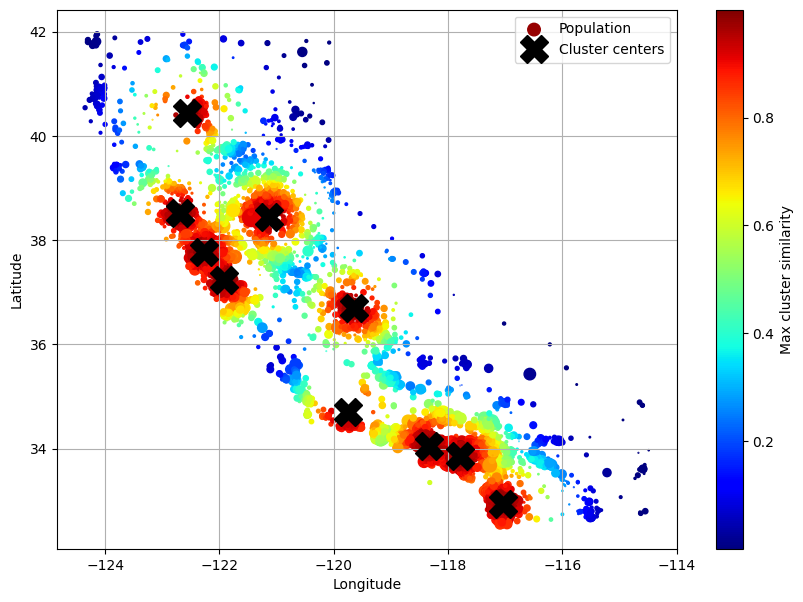

In [85]:
# extra code – this cell generates Figure 2–19

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
# save_fig("district_cluster_plot")
plt.show()

#### Training the model

In [86]:
from sklearn.linear_model import LinearRegression

#### Simplifying the preprocessing interface using sklearn pipelines

In [87]:
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.pipeline import make_pipeline


# standard function for combinining existing attributes to create new attribute - rooms_per_house, bedrooms_ratio, people_per_house
def column_ratio(X):

    return X[:,[0]]/ X[:,[1]]

def ratio_name(function_transformer, feature_names_in):

    return ['ratio']

def ratio_pipeline():

    return make_pipeline(
        SimpleImputer(strategy='median'),
        FunctionTransformer(column_ratio,feature_names_out=ratio_name),
        StandardScaler()
    )

# pipeline for handling distribution

log_pipeline =make_pipeline(
    SimpleImputer(strategy='median'),
    FunctionTransformer(np.log,feature_names_out='one-to-one'),
    StandardScaler()
)


# custom cluster similarity feature pipeline 

cluster_simil = ClusterSimilarity(n_clusters=10,gamma=1,random_state=42)

# pipeline for numerical features

default_num_pipeline = make_pipeline( SimpleImputer(strategy='median'),StandardScaler())


# pipeline for categorical features

cat_pipeline =make_pipeline(SimpleImputer(strategy='most_frequent'),
                            OneHotEncoder(handle_unknown='ignore'))






In [88]:
from sklearn.compose import ColumnTransformer

In [93]:
preprocessing = ColumnTransformer(
    [
    ('bedrooms',ratio_pipeline(),['total_bedrooms','total_rooms']),
    ('rooms_per_house',ratio_pipeline(),['total_rooms','households']),
    ('people_per_house',ratio_pipeline(),['population','households']),
    ('log',log_pipeline,['total_bedrooms','total_rooms',
                    'population','households','median_income']),
    ('geo',cluster_simil,['latitude','longitude']),
    ('cat',cat_pipeline,make_column_selector(dtype_include=object))
],
remainder = default_num_pipeline 
)

In [94]:
housing_prepared = preprocessing.fit_transform(housing)

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
lin_reg = make_pipeline(preprocessing,LinearRegression())

In [97]:
lin_reg.fit(housing,housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7fb...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(gamma=1,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb97135e900>)])),
                ('linearregression', LinearRegression())])

#### predictions

In [98]:
housing_predictions = lin_reg.predict(housing)

In [100]:
housing_predictions[:5].round(-2)

array([250400., 395000., 127400.,  87900., 332800.])

In [101]:
housing_labels[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

In [102]:
from sklearn.metrics import root_mean_squared_error

In [103]:
lin_rmse = root_mean_squared_error(housing_labels,housing_predictions)

In [104]:
lin_rmse

np.float64(68300.8872739978)

#### Using Other Models

In [105]:
from sklearn.tree import DecisionTreeRegressor

In [106]:
tree_reg = make_pipeline(preprocessing,DecisionTreeRegressor(random_state=42))

In [107]:
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7fb...
                                                  ClusterSimilarity(gamma=1,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb97135e900>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [108]:
housing_predictions = tree_reg.predict(housing)

In [109]:
tree_rmse = root_mean_squared_error(housing_labels,housing_predictions)

In [110]:
tree_rmse

np.float64(0.0)

##### cross validation score

In [112]:
from sklearn.model_selection import cross_val_score

In [113]:
tree_rmses = - cross_val_score(tree_reg,housing, housing_labels,scoring='neg_root_mean_squared_error',cv=10)

In [114]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     67216.025768
std       1922.191058
min      64687.848594
25%      66117.451107
50%      67234.133602
75%      67626.227487
max      71011.076018
dtype: float64

In [115]:
tree_rmses

array([64886.93509888, 65968.07258093, 67478.3344545 , 66565.58668701,
       64687.84859385, 67650.26223375, 67554.12324632, 69368.08602122,
       71011.07601759, 66989.93274882])

In [117]:
from sklearn.ensemble import RandomForestRegressor

In [118]:
forest_reg = make_pipeline(preprocessing,RandomForestRegressor(random_state=42))

In [119]:
forest_rmses = -cross_val_score(forest_reg,housing, housing_labels,scoring='neg_root_mean_squared_error',cv=10)

In [120]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     47133.159474
std       1021.454606
min      45495.652291
25%      46678.748270
50%      47239.749141
75%      47477.709571
max      49311.141107
dtype: float64

#### Fine Tune The Model (or) Hyperparameter tuning

In [123]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [124]:
full_pipeline = Pipeline([
    ('preprocessing',preprocessing),
    ('random_forest',RandomForestRegressor(random_state=42))
])

In [125]:
param_grid = [ 
    {
    'preprocessing__geo__n_clusters':[5,8,10],
    "random_forest__max_features":[4,6,8]
    },
    {
    'preprocessing__geo__n_clusters':[10,15],
    "random_forest__max_features":[6,8,10]
    }    
    ]

In [ ]:
grid_search = GridSearchCV(full_pipeline,param_grid,cv=3,scoring='neg_root_mean_squared_error')

In [127]:
grid_search.fit(housing, housing_labels)

/home/chandrakanth/Courses/PYTHON_AI_OPENAI_NOV_2024/venv/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fb97135e900>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [128]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [129]:
cv_res = pd.DataFrame(grid_search.cv_results_)

In [132]:
cv_res.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_preprocessing__geo__n_clusters',
       'param_random_forest__max_features', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [130]:
cv_res.sort_values(by='mean_test_score',ascending=False, inplace=True)

In [133]:
cv_res = cv_res[['param_preprocessing__geo__n_clusters',
                  'param_random_forest__max_features', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'mean_test_score',
                ]]

In [134]:
score_cols = ['split0','split1','split2','mean_test_rmse']

In [135]:
cv_res.columns = ['n_clusters','max_features'] + score_cols

In [136]:
cv_res[score_cols] = - cv_res[score_cols].round().astype(np.int64)

/tmp/ipykernel_1430/1554844315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv_res[score_cols] = - cv_res[score_cols].round().astype(np.int64)


In [137]:
cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
12,15,6,44145,44682,45306,44711
13,15,8,44839,45097,45661,45199
14,15,10,45127,45263,46050,45480
7,10,6,45306,46030,46497,45944
9,10,6,45306,46030,46497,45944
